<a href="https://colab.research.google.com/github/KashishTiwari-17/OIBSIP_Data-Science_task2/blob/main/task2%5Bunemployment_data%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📄 Dataset Preview:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

🔍 Missing Values:
 State                                  28

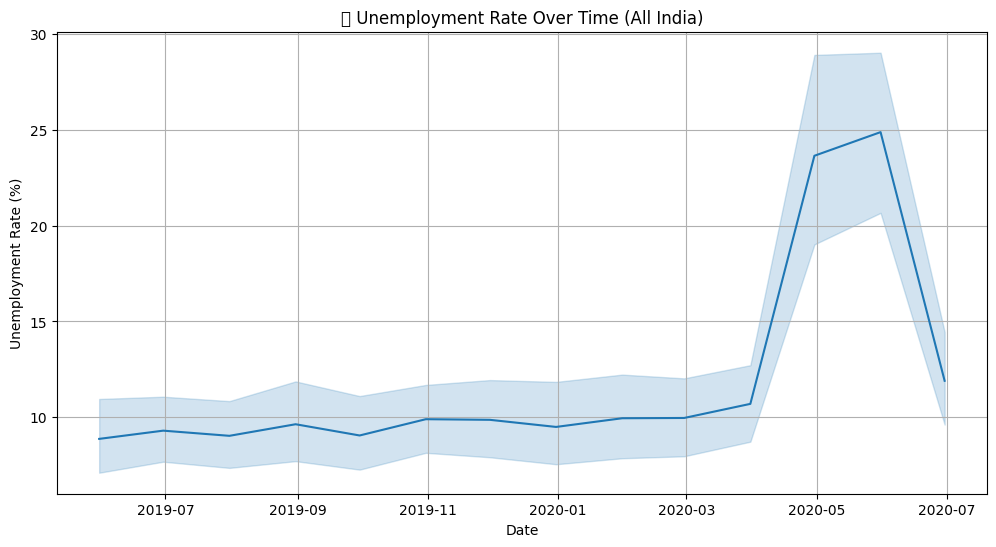

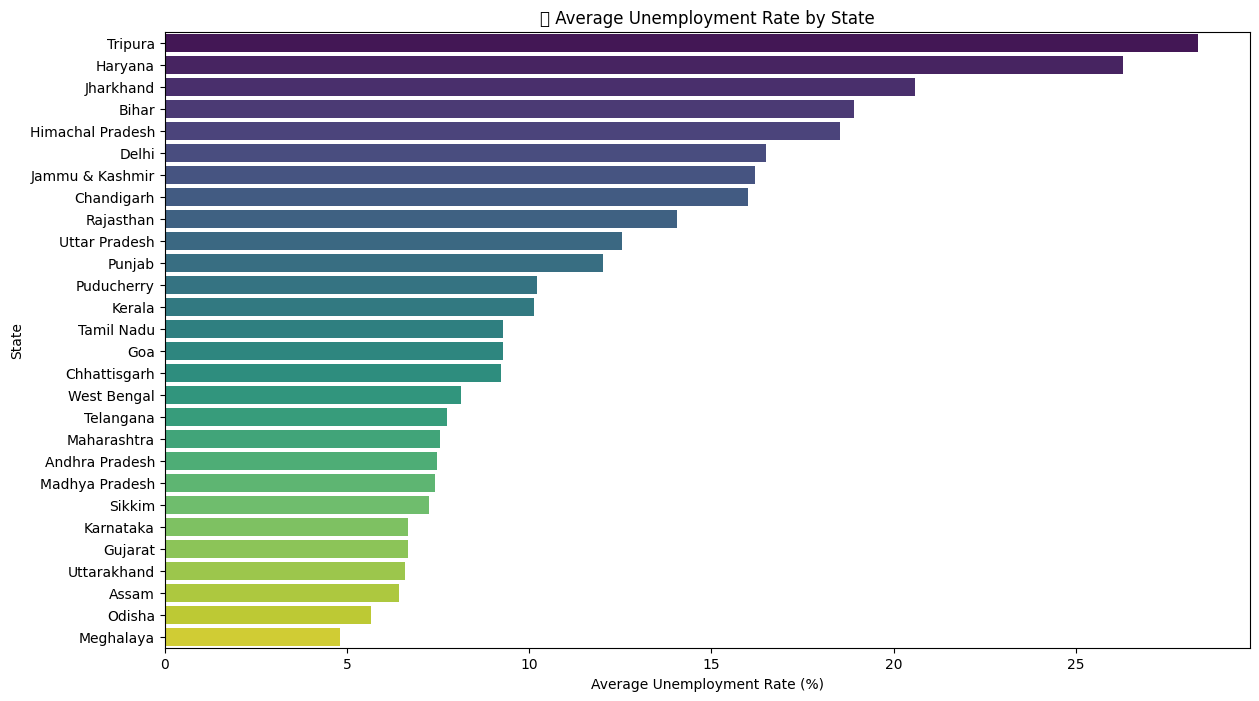

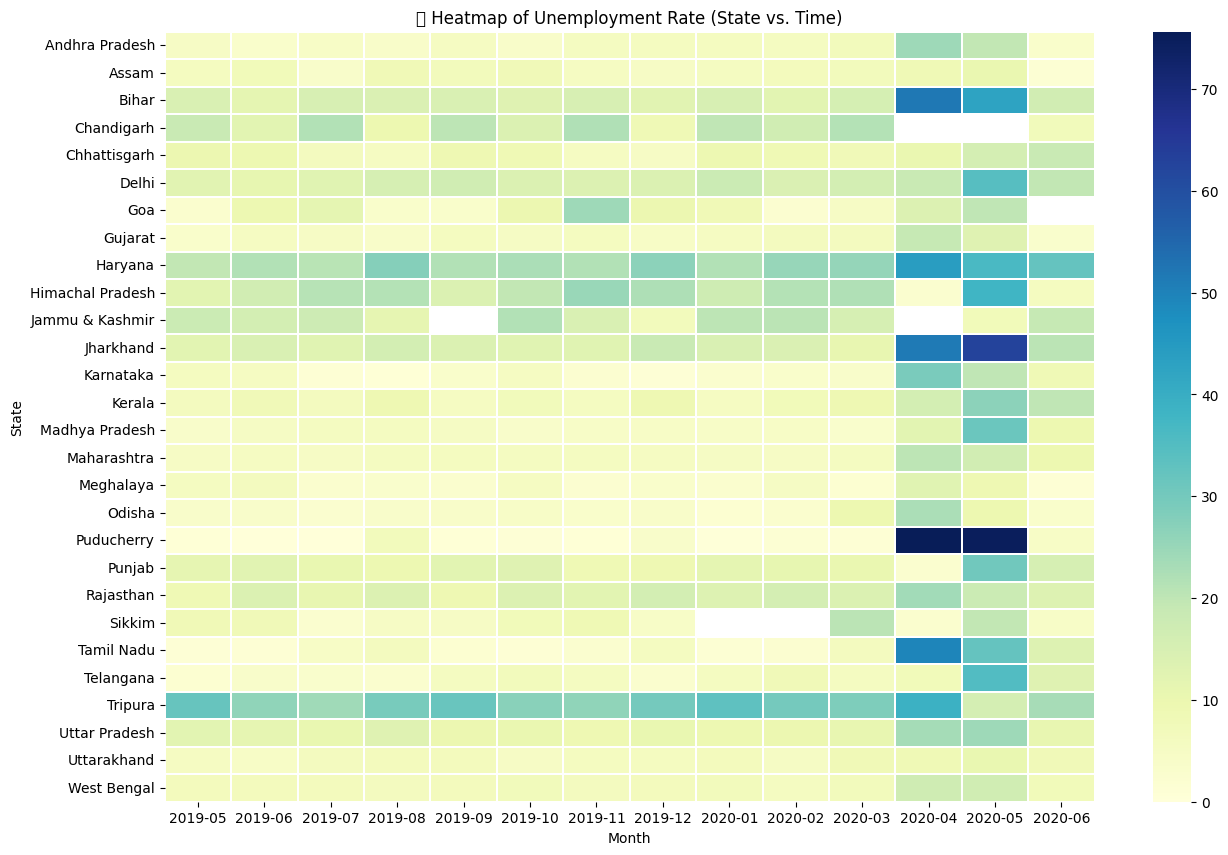


🔎 Analyze Unemployment Rate by State
Available States:
 Andhra Pradesh, Assam, Bihar, Chandigarh, Chhattisgarh, Delhi, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu & Kashmir, Jharkhand, Karnataka, Kerala, Madhya Pradesh, Maharashtra, Meghalaya, Odisha, Puducherry, Punjab, Rajasthan, Sikkim, Tamil Nadu, Telangana, Tripura, Uttar Pradesh, Uttarakhand, West Bengal

Enter a state to view its unemployment trend: kerala


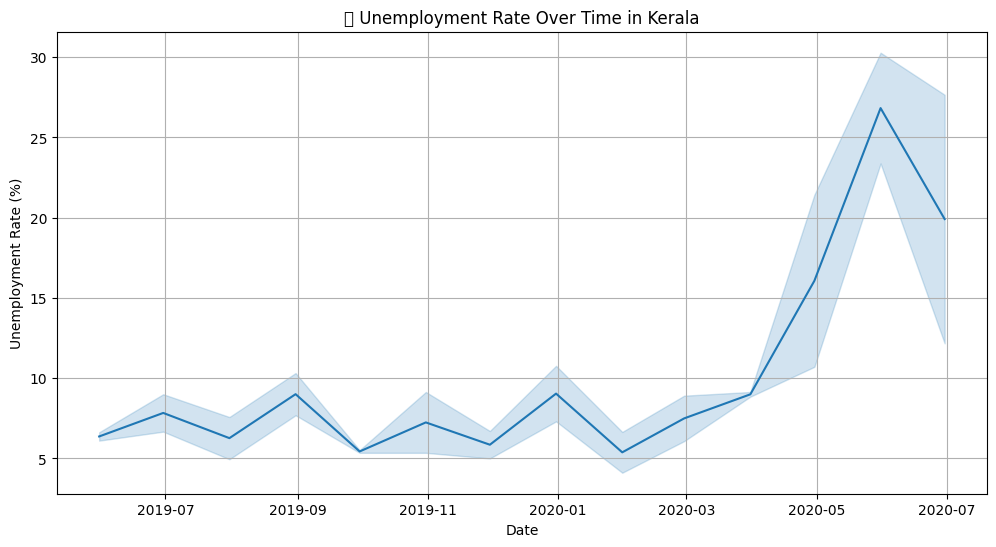


📊 Summary for Kerala:
Average Unemployment Rate: 10.12%
Max Unemployment Rate: 30.28% on 2020-05-31T00:00:00.000000000

Would you like to analyze another state? (y/n): n
✅ Thank you for exploring Unemployment Data in India!


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("/content/Unemployment in India.csv")
print("📄 Dataset Preview:\n", df.head())

# Rename columns for ease
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
              'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for null values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Drop rows with missing data
df.dropna(inplace=True)

# Overview
print("\n🧾 Dataset Info:\n")
print(df.info())

# ============================
# 📊 General Visualization
# ============================

# Unemployment Rate over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', data=df)
plt.title('📈 Unemployment Rate Over Time (All India)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

# State-wise average unemployment rate
state_avg = df.groupby('State')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title('📌 Average Unemployment Rate by State')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.show()

# Heatmap - Unemployment Rate by State and Month
df['Month'] = df['Date'].dt.strftime('%Y-%m')
pivot = df.pivot_table(values='Estimated Unemployment Rate', index='State', columns='Month')
plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='YlGnBu', linecolor='white', linewidths=0.1)
plt.title('🔥 Heatmap of Unemployment Rate (State vs. Time)')
plt.show()

# ============================
# 📥 User Input Analysis
# ============================

def analyze_state():
    print("\n🔎 Analyze Unemployment Rate by State")
    states = sorted(df['State'].unique())
    print("Available States:\n", ', '.join(states))

    selected_state = input("\nEnter a state to view its unemployment trend: ").title()
    if selected_state not in states:
        print("❌ Invalid state. Please check the spelling.")
        return

    state_df = df[df['State'] == selected_state]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Estimated Unemployment Rate', data=state_df)
    plt.title(f'📈 Unemployment Rate Over Time in {selected_state}')
    plt.xlabel('Date')
    plt.ylabel('Unemployment Rate (%)')
    plt.grid(True)
    plt.show()

    print(f"\n📊 Summary for {selected_state}:")
    print(f"Average Unemployment Rate: {state_df['Estimated Unemployment Rate'].mean():.2f}%")
    print(f"Max Unemployment Rate: {state_df['Estimated Unemployment Rate'].max():.2f}% on {state_df[state_df['Estimated Unemployment Rate'] == state_df['Estimated Unemployment Rate'].max()]['Date'].values[0]}")

# Run user loop
if __name__ == "__main__":
    while True:
        analyze_state()
        again = input("\nWould you like to analyze another state? (y/n): ").lower()
        if again != 'y':
            print("✅ Thank you for exploring Unemployment Data in India!")
            break
